# Data Manipulation and Visualization Revisited: Back to Broadway
Let's practice combining the skills you have developed so far. In this exercise we will take some of the familiar dataframe and plotting methods we have learned and combine them with loops to automate some tasks that would take quite a bit of time to produce without programming.

In [1]:
# standard imports
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('broadway.csv')
df.head()

,Attendance,Capacity,Day,Full,Gross,Gross Potential,Month,Name,Performances,Theatre,Type,Year
0,5500,88,26,08/26/1990,134456,0,8,Tru,8,Booth,Play,1990
1,1737,100,24,03/24/1991,100647,0,3,Miss Saigon,0,Broadway,Musical,1991
2,12160,100,31,03/31/1991,634424,0,3,Miss Saigon,0,Broadway,Musical,1991
3,13921,100,7,04/07/1991,713353,0,4,Miss Saigon,0,Broadway,Musical,1991
4,10973,90,14,04/14/1991,573981,0,4,Miss Saigon,4,Broadway,Musical,1991


## 1. Longest Running Productions
Find the 10 most common Broadway productions in the dataset. Assign the names of these productions to a list called 'playlist'. Do not hard code the list. 

Hint 1: value_counts() returns a series. You can sort and index into that series just like you would with a series inside a dataframe.

Hint 2: a series object has an attribute .index that can be used to get index values

#### Optional coding challenging: 
Do the task above in a single line of code.

In [2]:
# enter and test your code here

In [3]:
playlist = df['Name'].value_counts().head(10).index.tolist()

## 2. Automating Visualizations
Use 'playlist', 'df', and a for loop to generate line plots of average gross revenue BY YEAR for each of the top 10 plays seperately. 
Your for loop should include the nae of the play in the title of the chart. Your for loop should produce 10 plots in total.

Hint 1: the raw dataframe is not currently structured in a way that you can solve this task using the tools that you know. Think about how you need to transform the dataframe to get what you want. Your solution will most likely require both `groupby()`, `query()`, and some string formatting.

Hint 2: if you are having trouble working with the dataframe returned by a groupby aggregation, `reset_index()` might get things back to a more familiar state

In [2]:
# enter and test your code here

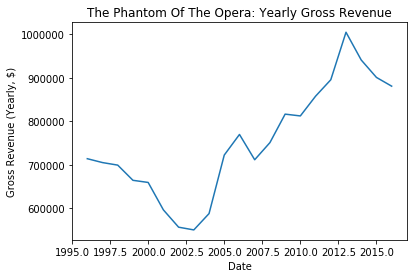

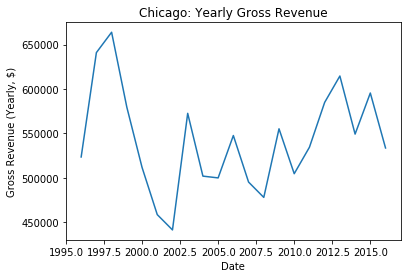

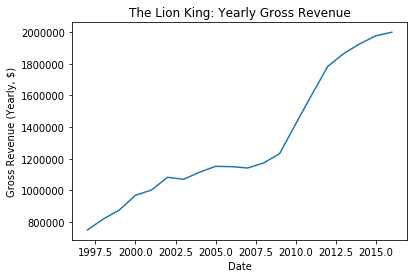

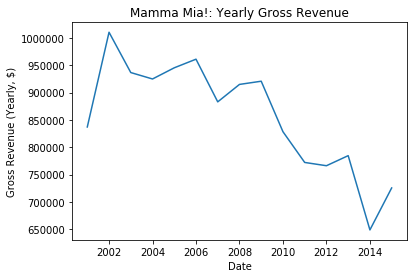

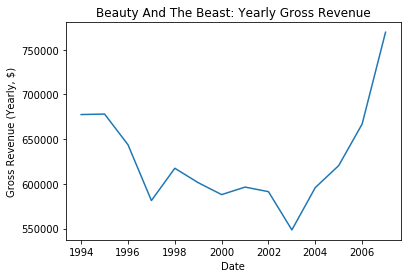

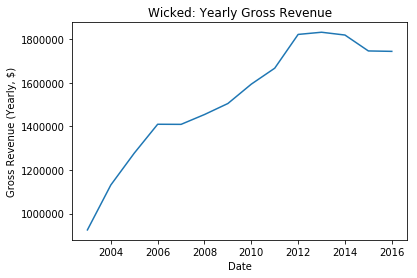

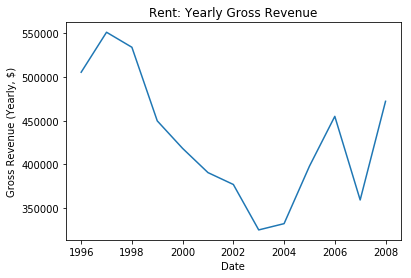

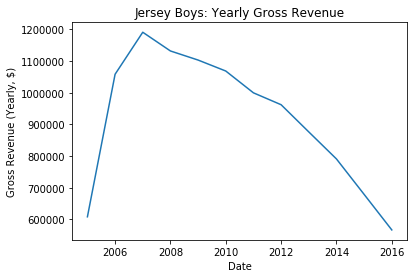

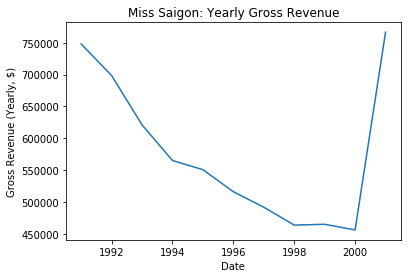

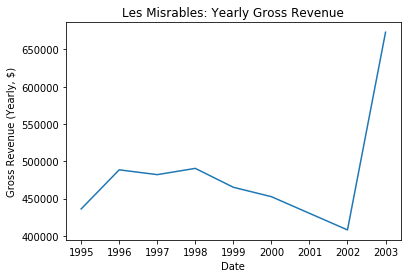

In [4]:
for play in playlist:
    dfp = df.query('Name == "{}"'.format(play))
    grouped_year_mean = dfp.groupby('Year').mean().reset_index()
    plt.plot('Year', 'Gross', data=grouped_year_mean)
    plt.xlabel("Date")
    plt.ylabel("Gross Revenue (Yearly, $)")
    plt.title("{}: Yearly Gross Revenue".format(play))
    plt.show()

## 3. Reusing Code, Part 1
Once you've developed code to solve a problem, you can often reuse it to solve related problems. Use the code from Problems 1 and 2 to find and visualize the the relation between year of production and average gross revenue for the top 10 broadway productions that are NOT musicals.  

In [5]:
# enter and test your code here

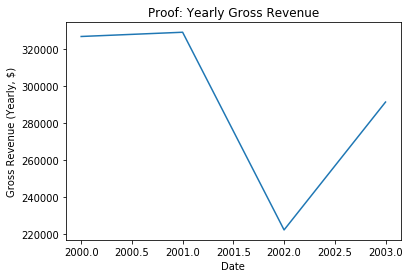

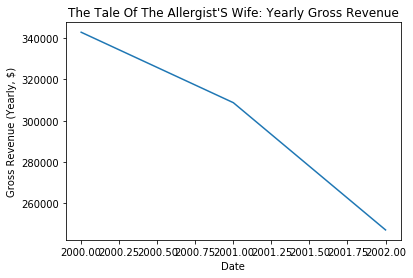

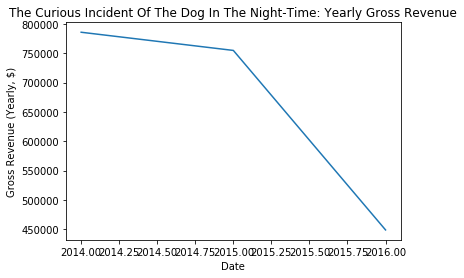

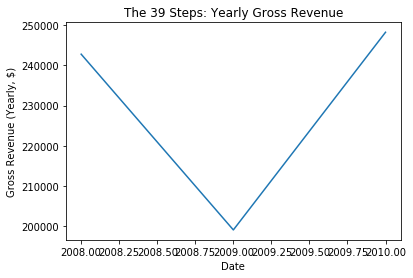

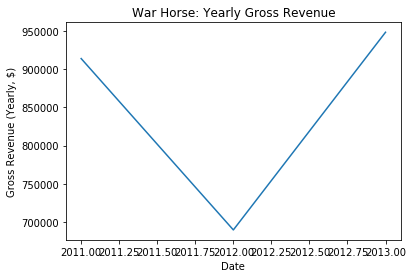

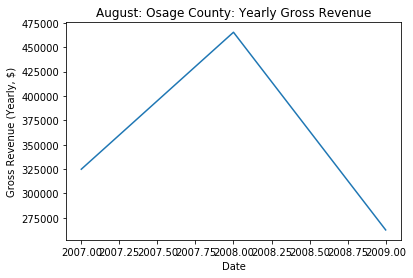

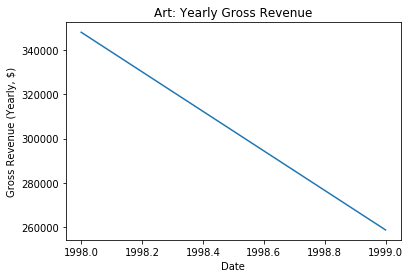

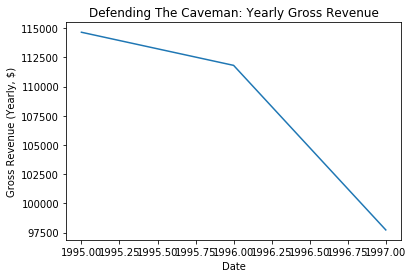

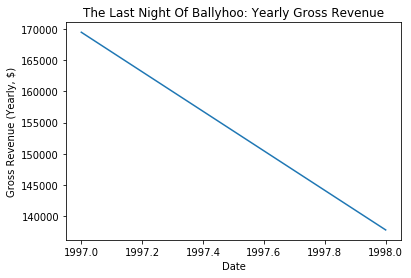

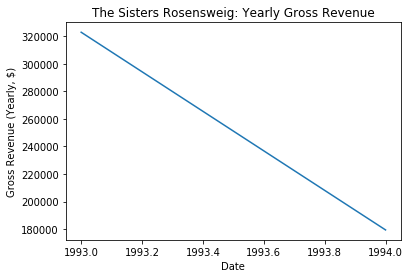

In [6]:
notmusicals = df.query('Type != "Musical"')
playlist_notmusicals = notmusicals['Name'].value_counts().head(10).index.tolist()

for play in playlist_notmusicals:
    dfp = df.query('Name == "{}"'.format(play))
    grouped_year_mean = dfp.groupby('Year').mean().reset_index()
    plt.plot('Year', 'Gross', data=grouped_year_mean)
    plt.xlabel("Date")
    plt.ylabel("Gross Revenue (Yearly, $)")
    plt.title("{}: Yearly Gross Revenue".format(play))
    plt.show()

## 4. Reusing Code, Part 2
Skip this is you have not completed the SimpleLinearRegression assignment.

Often a function or class written to solve a different problem can be resused to solve a new problem.
Use your SimpleLinearRegression class and a for loop to visualize the simple linear regression line describing the association between year and average gross revenue for ten plays of your choosing.

#### Optional coding challenge:
Complete the problem above for the 10 lowest grossing musicals between the year 2000 and 2010.

In [5]:
# enter and test your code here

The Phantom Of The Opera


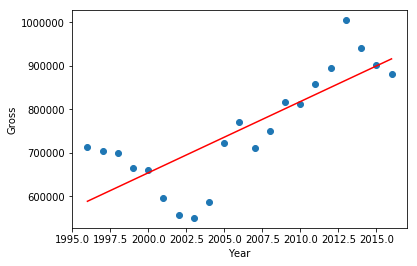

Chicago


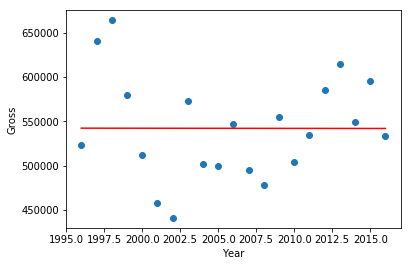

The Lion King


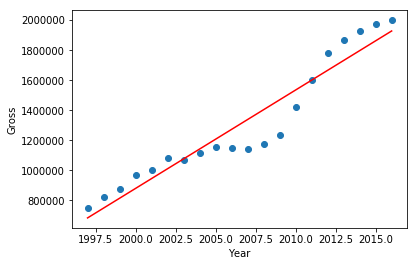

Mamma Mia!


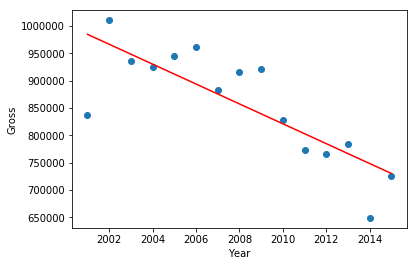

Beauty And The Beast


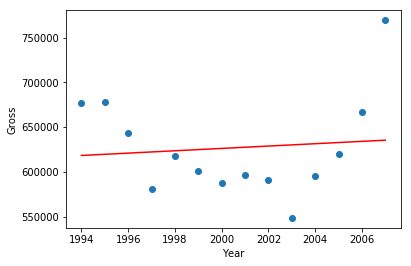

Wicked


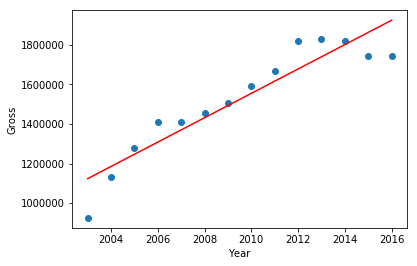

Rent


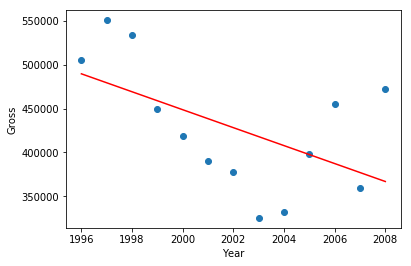

Jersey Boys


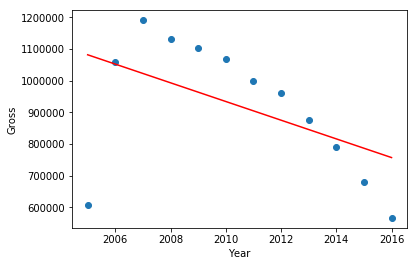

Miss Saigon


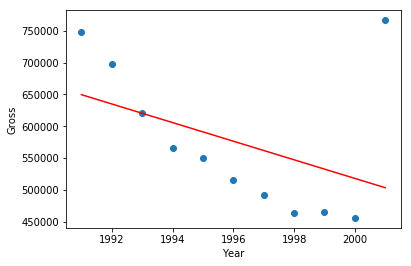

Les Misrables


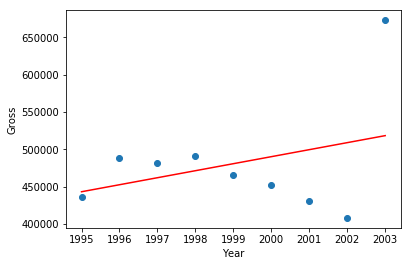

In [7]:
class SimpleLinearRegression:
    def __init__(self, data, xlabel, ylabel):
        ''' Store the dataframe and labels,
            and store the selected columns themselves for fast access.
        '''
        self.df = data
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.colX = data[xlabel]
        self.colY = data[ylabel]
        self.calc_fit()
    
    def calc_fit(self):
        ''' Calculate slope and intercept for the selected columns,
            and store as object attributes to be used in predict() and plot().
        '''
        self.slope = self.colX.cov(self.colY) / self.colX.var()
        self.intercept = self.colY.mean() - self.slope * self.colX.mean()
        
    def predict(self, x):
        ''' Predict an outcome for a given predictor value. '''
        y = self.intercept + self.slope * x
        return y
    
    def plot(self):
        ''' Plot the data from the selected columns with
            a best-fit linear regression line overlaid.
        '''
        plt.scatter(self.colX, self.colY)
        x1 = self.colX.min()
        x2 = self.colX.max()
        y1 = self.predict(x1)
        y2 = self.predict(x2)
        plt.plot([x1, x2], [y1, y2], 'r')
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        plt.show()
        
for play in playlist:
    print(play)
    dfp = df.query('Name == "{}"'.format(play))
    grouped_year_mean = dfp.groupby('Year').mean().reset_index()
    grouped_slr = SimpleLinearRegression(grouped_year_mean,'Year','Gross')
    grouped_slr.plot()